In [3]:
# import all necessary packages 

# packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# packages for model evaluation and classification models
from sklearn.model_selection import train_test_split,KFold,learning_curve,cross_validate,GridSearchCV,\
RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,roc_auc_score,roc_curve, auc 
from tqdm import tqdm

/Users/faithful/Desktop/Data_Sci_Projects/Bitcoin_Price_Predictor/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


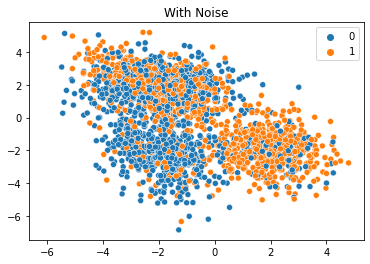

In [4]:
# create sample data
X,y = make_classification(n_samples=2500, n_features=4, 
                          n_informative=4, n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=2,class_sep=2,flip_y=0.4,weights=[0.5,0.5], 
                          random_state=42)
sns.scatterplot(X[:,0],X[:,1],hue=y);
plt.title("With Noise");
plt.show();


In [5]:
# train test split
# splits the data into train test split, creates test size & random seed
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=validation_size, random_state=seed)

In [53]:
def eval_learning_curves(models,x,y,scoring):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve for each model passed in. 

    Parameters
    ----------
    models : List of model name and instance
        ex: [('LR',LogisticRegression(max_iter=300)),
          ('KNN',KNeighborsClassifier())]
    X : Training X input Data
    Y : Training Y input data
    scoring : List of scoring parameters used to evaluate your models
        ex: [accuracy, precision, recall]
    """
   # stores the name of model and results
    names =[]
    results =[]
    seed = 42
   # loop through each model, get the name, perform kflod using crossvalidate
    for score in scoring:
        for name,model in tqdm(models):
            kfold = KFold(n_splits=5,random_state=seed,shuffle=True)
            plot_learning_curve(estimator=model,X=x,y=y,cv=kfold,train_sizes=np.linspace(0.1, 1, 10),
                               n_jobs=-1,title= f"{name} {score} Learning Curve",score=score)
    return results
           

In [6]:
models = [('LR',LogisticRegression(max_iter=300)),
          ('KNN',KNeighborsClassifier())]

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.03it/s]


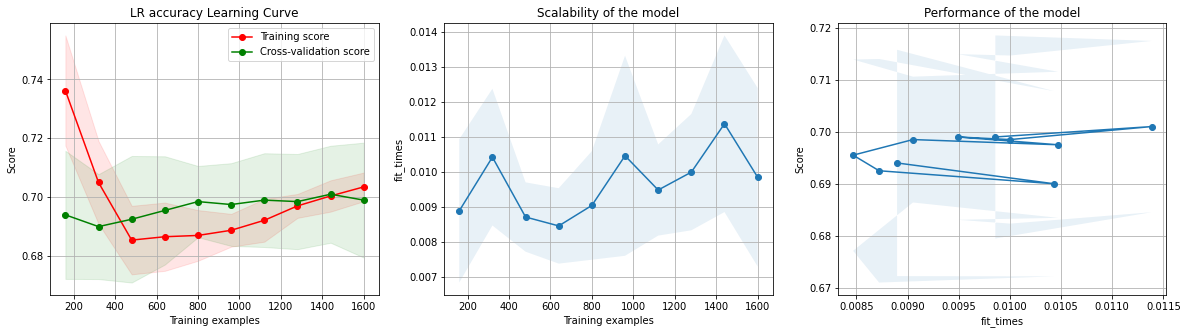

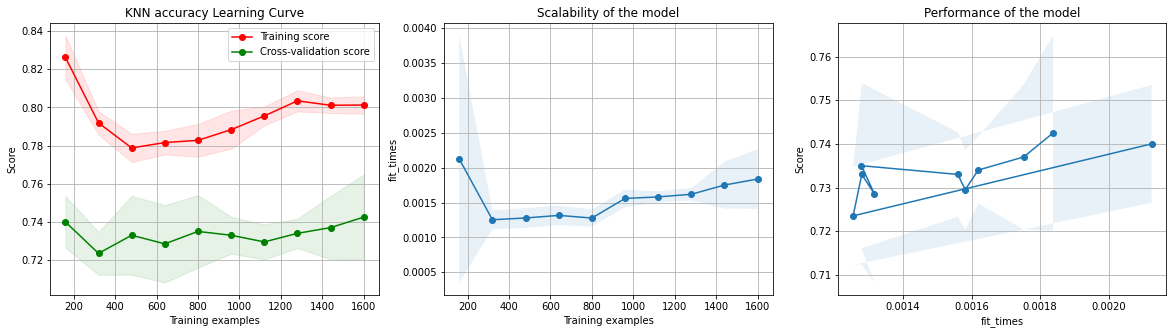

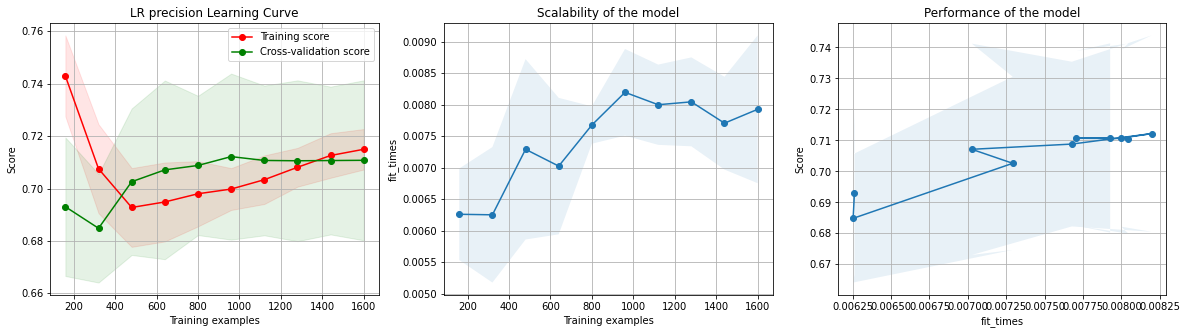

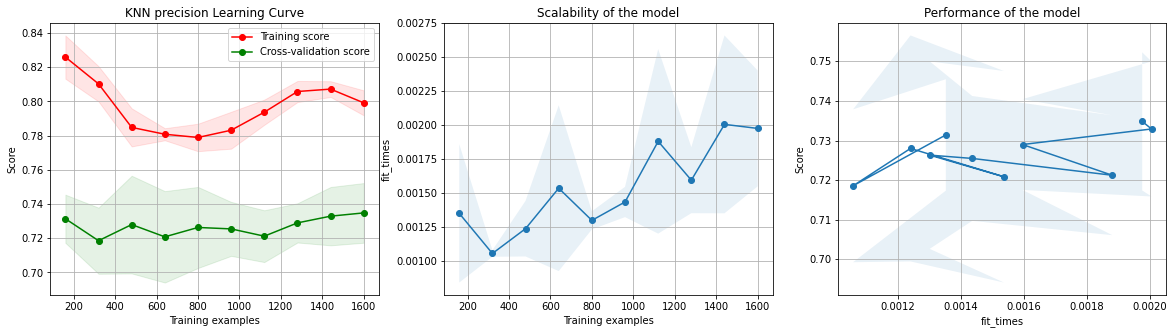

In [9]:
train = eval_learning_curves(models=models,x=X_train,y=y_train,scoring=['accuracy','precision'])

In [22]:
def plot_learning_curve(estimator, title,score, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.
        
    score : str
        A scoring parameter used to evaluate performance of the model.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,scoring=score,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    train_slope, train_intercept = np.polyfit(train_sizes, train_scores, 1)
    test_slope, test_intercept = np.polyfit(train_sizes, test_scores, 1)
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label=f"Training score (slope= {round(train_slope.mean(),5)}")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label=f"Cross-validation score (slope= {test_slope.mean()})")
    axes[0].legend(loc="best")
    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [25]:
# eval test and training data

def eval_model_performance(models,x_train,y_train,x_test,y_test):
    
    """
    Generate 2 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve for each model passed in. 

    Parameters
    ----------
    models : List of model name and instance
        ex: [('LR',LogisticRegression(max_iter=300)),
          ('KNN',KNeighborsClassifier())]
    x_train : Training X input data
    y_train : Training Y input data
    x_test : Testing X input data
    y_test : Testing y input data
    scoring : List of scoring parameters used to evaluate your models
        ex: [accuracy, precision, recall]
    """
    # create models report
    models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 
                                            'Recall_score','F1_score', 'Accuracy'])
    
    for name,model in tqdm(models):
        model.fit(x_train,y_train) # train the model
        y_pred = model.predict(x_test) # predict the test data
        t = pd.Series({ 
                     'Model': name,
                     'Precision_score': precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': recall_score(y_test, y_pred,average='macro'),
                     'F1_score': f1_score(y_test, y_pred,average='macro'),
                     'Accuracy': accuracy_score(y_test, y_pred)}
                   )
        models_report = models_report.append(t, ignore_index = True)
    # plot multiple ROC curves
        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
        # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict(x_test))
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()   # Display
    
    models_report
    return models_report
    



100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 22.85it/s]


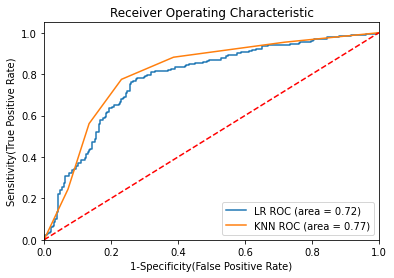

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LR,0.724247,0.723956,0.721990,0.722
1,KNN,0.771510,0.771858,0.771635,0.772


In [28]:
eval_model_performance(models=models,x_train=X_train,y_train=y_train,
                       x_test=X_test,y_test=y_test)

In [27]:
test

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LR,0.724247,0.723956,0.721990,0.722
1,KNN,0.771510,0.771858,0.771635,0.772


In [41]:
def plot_roc_curve(estimator,x_train,y_train,x_test,y_test):
    
    """
    This function plots the ROC curve.
    
    Parameters
    ----------
    estimator : a single model instance
        ex : KNeighborsClassifier()
    x_train : Training X input data
    y_train : Training Y input data
    x_test : Testing X input data
    y_test : Testing y input data
    
    """
    
    estimator.fit(x_train,y_train) # train the model
    name = type(estimator).__name__
    y_pred = estimator.predict(x_test) # predict the test data
    
   # plot ROC curves
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, estimator.predict_proba(x_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,estimator.predict(x_test))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()   # Display
    return 1

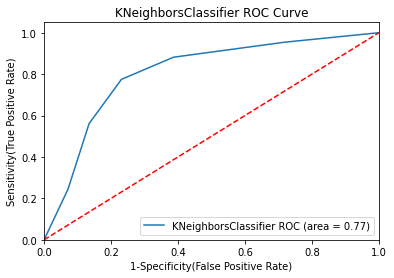

1

In [42]:
plot_roc_curve(estimator=KNeighborsClassifier(),x_train=X_train,y_train=y_train,
                       x_test=X_test,y_test=y_test)

<module 'matplotlib.pyplot' from '/Users/faithful/Desktop/Data_Sci_Projects/Bitcoin_Price_Predictor/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

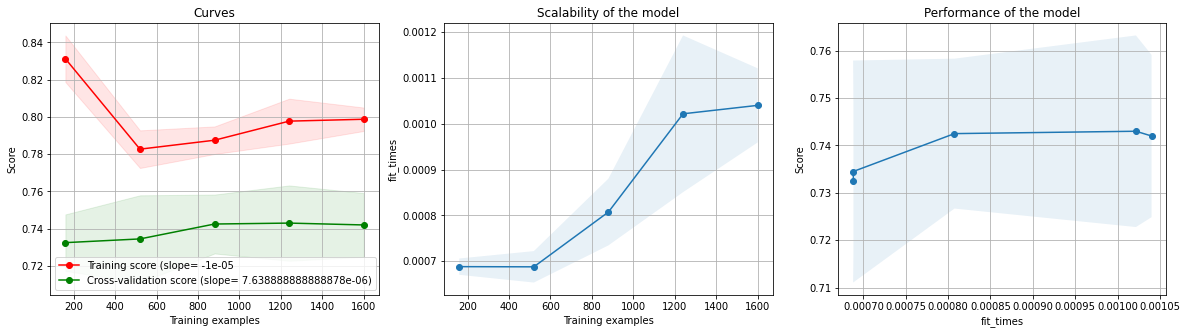

In [23]:
plot_learning_curve(estimator=KNeighborsClassifier(),title='Curves',X=X_train,
                    y=y_train,score='accuracy')

In [50]:
# plot confusion matrix
def plot_confusion_matrix(estimator, x_train, y_train, x_test, y_test, classes,
                          normalize=False,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    
    Parameters
    ----------
    estimator : a single model instance
        ex : KNeighborsClassifier()
    x_train : Training X input data
    y_train : Training Y input data
    x_test : Testing X input data
    y_test : Testing y input data
    classes : list like input for labeling the axis
        ex : classes= ['Buy=1','Sell=0']
    normalize : Bool that can be applied by setting `normalize=True`.
    cmap : color map type for confusion matrix. Default plt.cm.blues.
    """
    estimator.fit(x_train,y_train) # train the model
    y_pred = estimator.predict(x_test) # predict the test data
    cm = confusion_matrix(y_test,y_pred, labels=[1,0])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(f'{type(estimator).__name__} Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[203  59]
 [ 55 183]]


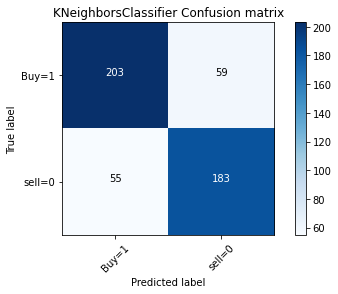

In [51]:
plot_confusion_matrix(estimator=KNeighborsClassifier(),x_train=X_train,y_train=y_train,x_test=X_test, 
                      y_test=y_test,classes=["Buy=1","sell=0"],normalize=False,cmap=plt.cm.Blues)

In [57]:
test_data = pd.DataFrame(np.random.randn(8, 4),
                   columns=['A', 'B', 'C', 'D'])

In [58]:
test_data

,A,B,C,D
0,-0.165666,-1.516873,0.924575,0.162240
1,-0.303391,0.381094,-0.439555,-1.290539
2,0.099584,-1.138081,0.075596,-1.991917
3,0.405972,0.715612,0.318830,-1.604070
4,-0.382250,-2.054984,-2.128648,-0.673862
5,-0.236076,0.493893,-0.749717,1.017828
6,-0.639579,1.334137,-0.868880,-0.855669
7,-1.250712,-0.727624,-1.291804,0.035426


In [59]:
test_data[:5]

,A,B,C,D
0,-0.165666,-1.516873,0.924575,0.162240
1,-0.303391,0.381094,-0.439555,-1.290539
2,0.099584,-1.138081,0.075596,-1.991917
3,0.405972,0.715612,0.318830,-1.604070
4,-0.382250,-2.054984,-2.128648,-0.673862


In [60]:
test_data[5:]

,A,B,C,D
5,-0.236076,0.493893,-0.749717,1.017828
6,-0.639579,1.334137,-0.868880,-0.855669
7,-1.250712,-0.727624,-1.291804,0.035426


In [19]:
length = np.random.random(10)
length.sort()
time = np.random.random(10)
time.sort()
# slope, intercept = np.polyfit(length, time, 1)
# print(slope)
# plt.loglog(length, time, '--')
# plt.show()

# train_slope, train_intercept = np.polyfit(train_sizes, train_scores, 1)
# test_slope, test_intercept = np.polyfit(train_sizes, test_scores, 1)
# #label = '%s ROC (area = %0.2f)' % (name, auc)
# label=f"Training score (slope= {train_slope})" 
# label=f"Cross-validation score (slope= {test_slope})"
Fitting_Log = np.polyfit(np.array(np.log(length)), np.array(np.log(time)), 1)   
Slope_Log_Fitted = Fitting_Log[0]
Slope_Log_Fitted

-0.6041131220578836

In [90]:
# read the data from the db

In [ ]:
# shuffle all the data

In [3]:
# store a percentage of my data as test dataset to a df or CSV 

In [7]:
# check for class imbalance in predictor column

In [ ]:
# run train test split

In [6]:
# fix class imbalance if necessary

In [8]:
# Test a few models and print scores and classification report 

In [9]:
# hyperparameter search using gridsearch or randomized search for at least 2 models

In [12]:
# plot a confusion matrix for all the models ran above

In [ ]:
# plot the ROC and AUC curves for the model

In [11]:
# pick the best model as your final model

In [ ]:
# test your model on your saved test data and evaluate the results.